In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

In [2]:
df = pd.read_csv('../Excel/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

In [6]:
cat_features = [col for col in df.columns if df[col].dtype == 'object']
cat_features

['country']

In [7]:
OE = OrdinalEncoder(handle_unknown='coerce')

X_OE = df.copy()
X_OE[cat_features] = OE.fit_transform(X_OE[cat_features])

In [10]:
X_OE

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1.0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2.0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3.0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4.0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162.0,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163.0,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164.0,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165.0,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
# instead of using get_dummies
OHE = OneHotEncoder(handle_unknown='error', sparse=False, drop='first')

OH_cols_train = pd.DataFrame(OHE.fit_transform(df[cat_features]))
OH_cols_train.index = df.index
num_X = df.drop(cat_features, axis=1)
X_OHE = pd.concat([num_X, OH_cols_train], axis=1)

In [9]:
X_OHE

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0,...,156,157,158,159,160,161,162,163,164,165
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
OE_features = [col for col in X_OE.columns]
OHE_features = [col for col in X_OHE.columns]

In [52]:
OE_SS = StandardScaler()
OHE_SS = StandardScaler()

X_OE = OE_SS.fit_transform(X_OE)
X_OHE = OHE_SS.fit_transform(X_OHE)

In [53]:
X_OHE.shape

(167, 175)

### We can use PCA for dimensionality reduction but I guess it won't improve time at all.

### The below for Ordinal Encoder

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [24]:
import time
k_range = list(range(5, 150, 5))
scores = []
kmeans_per_k = []
centers = []
inertias = []
start = time.time()
for k in k_range:
    kmeans = KMeans(algorithm='full', n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_OE)
    centers = kmeans.cluster_centers_
    score = silhouette_score(X_OE, preds)
    scores.append(score)
    inertias.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)
end = time.time()
tot_time = end-start
print(tot_time)

19.584659099578857


In [25]:
scores

[0.20030534986780393,
 0.2021085226818553,
 0.17139222243851118,
 0.17385377089276624,
 0.1721344746111209,
 0.1763386647344105,
 0.1596245111037286,
 0.166294234653467,
 0.15775346491594536,
 0.15379234259656832,
 0.15303495580366167,
 0.16458847192597048,
 0.13728004423571846,
 0.1418314589996795,
 0.13125045558654924,
 0.1274417967007054,
 0.13403281205201284,
 0.13831950915657348,
 0.12902103778664925,
 0.1362293278352807,
 0.12508693516936498,
 0.11206539566723275,
 0.0967964116934718,
 0.1034061881433042,
 0.09194313471093837,
 0.08551728335316583,
 0.0804574499390062,
 0.06381373436747384,
 0.054323114173155905]

In [26]:
np.argmax(scores)

1

In [29]:
#Repeated it because I noticed that 10 and fewer has the best scores
k_range = list(range(2, 20))
scores = []
kmeans_per_k = []
centers = []
inertias = []
start = time.time()
for k in k_range:
    kmeans = KMeans(algorithm='full', n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_OE)
    centers = kmeans.cluster_centers_
    score = silhouette_score(X_OE, preds)
    scores.append(score)
    inertias.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)
end = time.time()
tot_time = end-start
print(tot_time)

9.160505294799805


In [30]:
scores

[0.25223697128320827,
 0.24043690533753967,
 0.25313157179353923,
 0.20030534986780393,
 0.2071639198149279,
 0.19542020383401235,
 0.20815961301657612,
 0.21315626283105807,
 0.2021085226818553,
 0.1961650147464015,
 0.19520627001798038,
 0.20770093502895276,
 0.1873866050705496,
 0.17139222243851118,
 0.17691123772054582,
 0.18539781029914165,
 0.16790368550658355,
 0.17494879137801603]

In [33]:
best_index = np.argmax(scores)
best_k = k_range[best_index]
best_score = scores[best_index]
best_model = kmeans_per_k[best_index]

In [61]:
best_index

2

In [35]:
best_score

0.25313157179353923

In [44]:
best_k

4

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

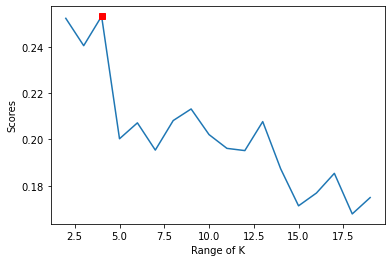

In [42]:
plt.plot(k_range, scores)
plt.plot(k_range[best_index], scores[best_index], 'rs')
plt.xlabel('Range of K')
plt.ylabel('Scores')
plt.show()

In [64]:
kmeans_per_k[best_index-1]

KMeans(algorithm='full', n_clusters=3, random_state=42)

In [65]:
#Although best model is when k = 4, but I chose 3 since the difference is not that big
km = kmeans_per_k[best_index-1]
clust_labels = km.fit_predict(X_OE)
centers = km.cluster_centers_
score = silhouette_score(X_OE, preds)
kmeans = pd.DataFrame(clust_labels)

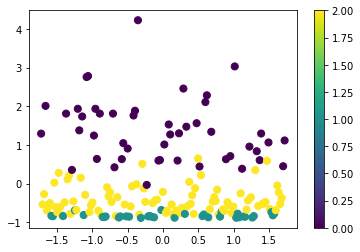

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_OE[:,0], X_OE[:,1],
                     c=kmeans[0], s=50)
plt.plot

plt.colorbar(scatter)

### For One Hot Encoder

In [71]:
k_range = list(range(2,20))
scores = []
kmeans_per_k = []
centers = []
inertias = []
start = time.time()
for k in k_range:
    kmeans = KMeans(algorithm='full', n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_OHE)
    centers = kmeans.cluster_centers_
    score = silhouette_score(X_OHE, preds)
    scores.append(score)
    inertias.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)
end = time.time()
tot_time = end-start
print(tot_time)

9.787101745605469


In [72]:
scores

[0.01441454344353715,
 0.0109587190472114,
 0.011085129162454594,
 0.006148187788519044,
 0.005909675192366414,
 0.00625375698718138,
 0.0043480738028357285,
 0.003324881582845815,
 0.0021374382034810295,
 0.003874910303753034,
 0.002379564956779001,
 0.002609092887829937,
 0.0028484079878457196,
 0.002370198386741392,
 -0.00010353220860132625,
 -0.0024763385550079817,
 0.0007091284095942242,
 0.002540459853156001]

In [73]:
#Lets try PCA

from sklearn.decomposition import PCA

In [88]:
pca = PCA(0.75)
X_OHE.shape

(167, 175)

In [89]:
X_OHE_PCA = pca.fit_transform(X_OHE)
X_OHE_PCA.shape

(167, 122)

In [92]:
k_range = list(range(2,20))
scores = []
kmeans_per_k = []
centers = []
inertias = []
start = time.time()
for k in k_range:
    kmeans = KMeans(algorithm='full', n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_OHE_PCA)
    centers = kmeans.cluster_centers_
    score = silhouette_score(X_OHE_PCA, preds)
    scores.append(score)
    inertias.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)
end = time.time()
tot_time = end-start
print(tot_time)

10.074920654296875


In [93]:
scores

[0.021034510384875665,
 0.022134722326606824,
 0.010326542352689717,
 0.013934765057376527,
 0.013491999747066432,
 0.01377880588587369,
 -0.018962301518554787,
 -0.0060594286933479255,
 -0.008329098924931052,
 0.00013145694258130512,
 -0.014225618370327047,
 -0.020143678191499752,
 -0.02656247102468648,
 -0.02282442928551224,
 -0.009969039641000505,
 -0.015562666545266422,
 -0.025768854432628545,
 -0.020945507643156537]

### The lower the PCA's n_components the better the score but it's not worth it unlike the Ordinal Encoder
#### Chose Ordinal Encoder since countries are ordered by alphabets, so since they are already ordered, why not use ordinal encoder